<a href="https://colab.research.google.com/github/nanangyudi/2020pds_b/blob/main/ProjekPDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

mengimport modul padas sebagai pd untuk menganalisis data,
dan mengimport data yang ingin dianalisis

In [ ]:
import pandas as pd
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving cars_test_new.csv to cars_test_new.csv


In [ ]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "validate.csv" with length 1639144 bytes


In [ ]:
uploaded

{'validate.csv': b'"id","title","band","model","variant","fuelType","bodytype","tramsmission","seating","year","milage","color","image","place","price"\n"41256","2012 Toyota Avanza 1.3 G MPV","Toyota","Avanza","G","Pertamax","MPV","Automatic","7","2012","62500","Hitam","https://img1.icarcdn.com/8419806/thumb-l_used-car-mobil123-toyota-avanza-g-mpv-indonesia_8419806_hyKMVmA56CWEQcNm6NcXn5.jpg?smia=xTM","Jakarta Selatan","112000000"\n"5637","2014 Honda Mobilio 1.5 E Prestige MPV","Honda","Mobilio","E Prestige","Pertamax","MPV","Automatic","7","2014","70000","Putih","https://img5.icarcdn.com/0798656/thumb-l_used-car-mobil123-honda-mobilio-e-prestige-mpv-indonesia_0798656_wcHBOXdfSAGGGNUSGOfAIp.jpg?smia=xTM","Makasar","135000000"\n"61059","2014 Ford EcoSport 1.5 Titanium SUV","Ford","EcoSport","Titanium","Pertamax","SUV","Automatic","5","2014","108000","Silver","https://img4.icarcdn.com/3308465/thumb-l_used-car-mobil123-ford-ecosport-titanium-suv-indonesia_3308465_V1FwblazUFP9S9q8BtmxUT.jp

In [ ]:
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
uploaded = files.upload()

Saving validate.csv to validate.csv


proses mengimport dataset yanhg ingin di analisis

In [ ]:
projek_dataset=pd.read_csv("cars_test_new.csv")

In [ ]:
projek_dataset=pd.read_csv("train.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
projek_dataset=pd.read_csv("validate.csv")

EKSPLORASI AWAL

proses untuk menampilkan 5 data paling awal dari data yang telah di import

In [ ]:
projek_dataset.head()

,id,title,band,model,variant,fuelType,bodytype,tramsmission,seating,year,milage,color,image,place,price
0,41256,2012 Toyota Avanza 1.3 G MPV,Toyota,Avanza,G,Pertamax,MPV,Automatic,7,2012,62500,Hitam,https://img1.icarcdn.com/8419806/thumb-l_used-...,Jakarta Selatan,112000000
1,5637,2014 Honda Mobilio 1.5 E Prestige MPV,Honda,Mobilio,E Prestige,Pertamax,MPV,Automatic,7,2014,70000,Putih,https://img5.icarcdn.com/0798656/thumb-l_used-...,Makasar,135000000
2,61059,2014 Ford EcoSport 1.5 Titanium SUV,Ford,EcoSport,Titanium,Pertamax,SUV,Automatic,5,2014,108000,Silver,https://img4.icarcdn.com/3308465/thumb-l_used-...,Bekasi,133000000
3,75984,2007 Toyota Kijang Innova 2.0 E MPV,Toyota,Kijang Innova,E,Pertamax,MPV,Manual,8,2007,46000,Hitam,https://img1.icarcdn.com/9066856/thumb-l_used-...,Jakarta Barat,98000000
4,35687,2017 Daihatsu Ayla 1.0 X Hatchback,Daihatsu,Ayla,X,Pertamax,Hatchback,Manual,5,2017,45000,Merah,https://img1.icarcdn.com/5359506/thumb-l_used-...,Surabaya,110000000


menampilkan dimensi dari data,
data yang di import memiliki 5585 baris dan 15 kolom

In [ ]:
projek_dataset.shape

(5585, 15)

menampilkan daftar nama kolom yang ada pada data HargaMobilBekas yang dalam data tersebut terdapat 15 kolom

In [ ]:
projek_dataset.columns

Index(['id', 'title', 'band', 'model', 'variant', 'fuelType', 'bodytype',
       'tramsmission', 'seating', 'year', 'milage', 'color', 'image', 'place',
       'price'],
      dtype='object')

menampilkan deskripsi dari data untuk mengetahui jumlah, rata-rata, standar deviasi,nilai terkecil, Q1, Q2, Q3 dan nilai terbesar dari data 

In [ ]:
projek_dataset.describe()

,id,seating,year,milage,price
count,5585.000000,5585.000000,5585.000000,5.585000e+03,5.585000e+03
mean,45403.153805,5.994270,2013.400716,5.832309e+04,2.702140e+08
std,25974.160959,1.307339,4.037326,6.361408e+04,4.130507e+08
min,17.000000,2.000000,1977.000000,1.000000e+02,9.300000e+04
25%,22413.000000,5.000000,2012.000000,2.510500e+04,1.150000e+08
50%,45485.000000,5.000000,2014.000000,5.000000e+04,1.550000e+08
75%,68428.000000,7.000000,2016.000000,8.000000e+04,2.450000e+08
max,89577.000000,14.000000,2019.000000,3.000001e+06,6.800000e+09


untuk mengetahui nilai rata-rata dari harga mobil

In [ ]:
projek_dataset.describe().loc['mean', 'price']

270213951.27520144

untuk mengetahui tahun keluaran terbaru

In [ ]:
projek_dataset.describe().loc['max', 'year']

2019.0

untuk mengetahui tahun keluaran terlama

In [ ]:
projek_dataset.describe().loc['min', 'year']

1977.0

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

menampilkan histogram dari tabel price

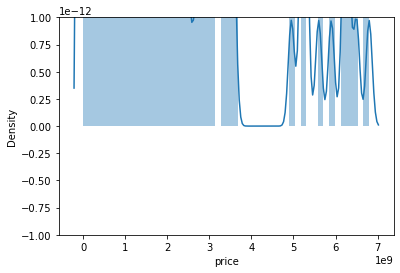

In [ ]:
sns.distplot(projek_dataset['price']);

proses menampilkan Skewness dan Kurtosis dari data

In [ ]:
print("Skewness: %f" % projek_dataset['price'].skew())
print("Kurtosis: %f" % projek_dataset['price'].kurt())

Skewness: 7.382236
Kurtosis: 81.472191


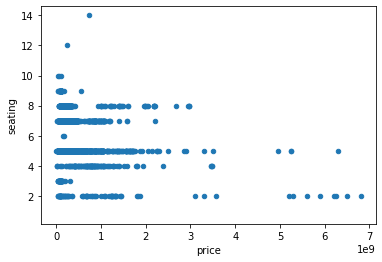

In [ ]:
var = 'price'
data = pd.concat([projek_dataset['seating'], projek_dataset[var]], axis=1)
data.plot.scatter(x=var, y='seating', ylim=(0.14000000));

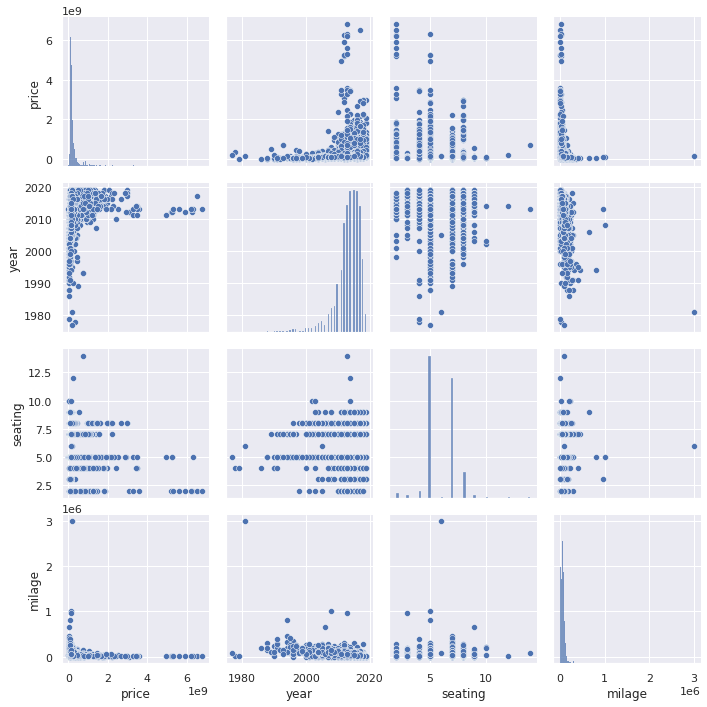

In [ ]:
sns.set()
cols = ['price', 'year', 'seating', 'milage']
sns.pairplot(projek_dataset[cols], size = 2.5)
plt.show();

In [ ]:
total = projek_dataset.isnull().sum().sort_values(ascending=False)
percent = (projek_dataset.isnull().sum()/projek_dataset.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
variant,119,0.021307
bodytype,13,0.002328
fuelType,1,0.000179
price,0,0.000000
place,0,0.000000
image,0,0.000000
color,0,0.000000
milage,0,0.000000
year,0,0.000000
seating,0,0.000000


melakukan pembersihan data terhadap data yang kosong/tidak memiliki nilai

In [ ]:
projek_dataset = projek_dataset.dropna()

untuk melihat dimensi dari data setelah dilakukan pembersihan, yang data awalnya terdapat 5585 baris, setelah dibersihkan datanya menjadi 5452 dan untuk kolomnya berjumlah tetap seperti sebelumnya yaitu 15 kolom karena dalam prose pembersihan/dropna yang dihapus adalah barisnya saja

In [ ]:
projek_dataset.shape

(5452, 15)

proses pemilihan target prediksi, dalam hal ini akan melakukan prediksi dari harga mobil

In [ ]:
y = projek_dataset['price']
y

0        112000000
1        135000000
2        133000000
3         98000000
4        110000000
           ...    
5580     242000000
5581    1450000000
5582     147000000
5583     119000000
5584     140000000
Name: price, Length: 5452, dtype: int64

proses pemilihan fitur, dalam hal ini fitur yang dipilih yaitu id, seating dan year untuk melakukan prediksi harga tadi

In [ ]:
features = ['id', 'seating', 'year']
X = projek_dataset[features]
X

,id,seating,year
0,41256,7,2012
1,5637,7,2014
2,61059,5,2014
3,75984,8,2007
4,35687,5,2017
...,...,...,...
5580,56388,5,2016
5581,16471,8,2013
5582,10803,7,2015
5583,14175,5,2013


proses untuk mendeskripsikan fitur-fitur tadi apakah terdapat anomaly pada dataset

In [ ]:
X.describe()

,id,seating,year
count,5452.000000,5452.000000,5452.000000
mean,45449.232208,6.008437,2013.592260
std,25939.709505,1.296568,3.640832
min,17.000000,2.000000,1977.000000
25%,22524.500000,5.000000,2012.000000
50%,45495.000000,5.000000,2014.000000
75%,68439.500000,7.000000,2016.000000
max,89577.000000,14.000000,2019.000000


proses pembangunan model
model decision tree dapat digunakan untuk regresi maupun klasifikasi
dalam proses ini model secision tree untuk melakukan regresi/memprediksi nilai
regresi tree bisa kita peroleh dari sklearn

In [ ]:
from sklearn.tree import DecisionTreeRegressor

membuat objek dari decision tree  dengan menyertakan random state merupakan nilai dari random state untuk membuat objek dari decision tree regressor
dalam hal ini objeknya bernama dataset_model

In [ ]:
dataset_model = DecisionTreeRegressor(random_state=1)

proses training model yang dilakukan dengan menggunakan method_fit dengan meyertakan 2 parameter X=fitures dan y=target prediksi

In [ ]:
dataset_model.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

kode untuk melakukan prediksi dari target

In [ ]:
dataset_model.predict(X.head())

array([1.12e+08, 1.35e+08, 1.33e+08, 9.80e+07, 1.10e+08])

menampilkan nilai asli, selanjutnya membandingkan dengan nilai prediksi, disini kedua nilai sama karena melakukan training dan pengujian/prediksi menggunakan data set yang sama sehingga menampilkan data yang akurat

In [ ]:
y.head()

0    112000000
1    135000000
2    133000000
3     98000000
4    110000000
Name: price, dtype: int64

evaluasi model
dilakukan untuk mengukur performa dari model data yg di analisis

In [ ]:
from sklearn.metrics import mean_absolute_error

menghitung performa dari model
memprediksi dari harga mobil dari sejumlah fitur yang tersimpan pada variabel X dan hasilnya akan tersimpan pada variabel y_hat
sehingga akan menampilkan rata-rata absolute error simpangan dari prediksi terhadap actual data
disini menunjukkan nilai yg cukup kecil yang berarti semakin baik karena error nya semakin sedikit

In [ ]:
y_hat = dataset_model.predict(X)
mean_absolute_error(y, y_hat)

0.00036683785766691124

training dan testing dataset

In [ ]:
from sklearn.model_selection import train_test_split

membagi dataset menjadi dua bagian yaitu training dataset dan testing dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

melakukan konfigurasi dan training model 

In [ ]:
dataset_model = DecisionTreeRegressor(random_state = 1)
dataset_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

Evaluasi model, disini dataset model akan melakukan prediksi terhadap testing dataset dan hasilnya akan tertampung pada variabel y_hat, selanjutnya mengevaluasi performa dengan menggunakan y_test dan y_hat,
dan akan menampilkan tingkat error prediksi terhadap nilai sebenarnya

In [ ]:
y_hat = dataset_model.predict(X_test)
mean_absolute_error(y_test, y_hat)

210109499.9214967

Optimasi Model

In [ ]:
def get_mae(max_leaf_node,X_train, X_test, y_train, y_test):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(X_train, y_train)
    y_hat = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_hat)
    return mae

proses ini dapat melakukan kontrol node, disini membandingkan node maksimalnya yaitu 50, 500, 5000. selanjutnya akan menampilkan rata-rata absolute error dari masing-masing max nodes, jumlah maksimum leaf nodes semakin tinggi tidak menjamin hasilnya juga semakin baik, tetapi proses ini bisa memberikan gambaran bagaimana untuk mendapatkan parameter yang optimum

In [ ]:
for max_leaf_nodes in [50, 500, 5000]:
    leaf_mae = get_mae(max_leaf_nodes,X_train, X_test, y_train, y_test)
    print(f'Max Leaf Nodes: {max_leaf_nodes} \t Mean Absolute Error: {int(leaf_mae)}')

Max Leaf Nodes: 50 	 Mean Absolute Error: 166474287
Max Leaf Nodes: 500 	 Mean Absolute Error: 184516664
Max Leaf Nodes: 5000 	 Mean Absolute Error: 198868183


Eksplorasi dengan Random Forrest

membangun model Random Forrest Refressor, dengan mengimport RandomForrestRegressor. dalam model ini berisi sekumpulan dari Decision Tree

In [ ]:
from sklearn.ensemble import RandomForestRegressor

membuat objek dari modelnya yaitu RandomForrestRegressor dengan menggunakan 2 parameter yaitu n_estimators/jumlah tree yang digunakan = 100 dan random_state.
selanjutnya melakukan proses training dengan .fit, dan memprediksi model yang nantinya nilainya dimasukkan kedalam variabel y_hat. dan yang terakhir menghitung jarak atau simpangan antara y_test dan y_hat dan akan menampilkan nilai erornya.

In [ ]:
rforest_model = RandomForestRegressor(n_estimators=100, random_state=1)
rforest_model.fit(X_train, y_train)
y_hat = rforest_model.predict(X_test)
print(f'Mean Absolute Error: {int(mean_absolute_error(y_test, y_hat))}')

Mean Absolute Error: 178173971
